In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])


In [5]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [6]:
model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 2s 685us/step - loss: 0.4895 - accuracy: 0.8601

In [7]:
model.evaluate(x_test, y_test, verbose=2)

probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

313/313 - 0s - loss: 0.0749 - accuracy: 0.9778


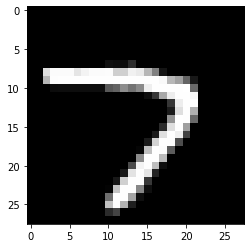

Model predicted 7


In [15]:
image = x_test[70]

fig = plt.figure()
plt.imshow(image, cmap='gray')
plt.show()

image = np.expand_dims(image,0)

print("Model predicted " + str(np.argmax(probability_model.predict(image))))
#print(probability_model.predict(image))

In [12]:
print(y_train[70])

1
